In [ ]:
#kaart maken van de shit
#overzicht van alles, simpele metrics.

In [109]:
import pandas as pd

aed_locations = pd.read_csv('aed_locations_coordinates_processed.csv')
card_arrest = pd.read_csv('card_arrest_processed.csv')
all_hospital_locations = pd.read_csv('hospital_coordinates_processed.csv')
removed_aed = pd.read_csv('removed_AED.csv')

In [110]:
#kan ook een temporal pattern geven van de cardiac arrests, dus waar ze plaatsvinden, over tijd. Dan een kaart tonen, en 
#de stippen toevoegen in order of occurrence. Dan moet ik wel de data bijhouden en die kolom niet droppen in de data cleaning.

In [111]:
#during the data cleaning itself, 3576 AED were removed from the original 15227, equal to 23.48% of the original total. 2825 (18.55% of the total)
#because the coordinates could not be retrieved via Nomatim, for example because the provided address had abbreviations or misspellings.
#749 (4.91%) because they were considered to be unavailable to the public, and thus not useable.
#2 were removed simply because the address was missing.
removed_aed['reason'].value_counts()

reason
missing_coordinates    2825
not_available           749
address_missing           2
Name: count, dtype: int64

In [112]:
aed_locations.head()
#card_arrest.head()
#all_hospital_locations.head()
#missing_values_count_lat = all_hospital_locations['latitude'].isnull().sum()
#missing_values_count_long = all_hospital_locations['longitude'].isnull().sum()
#missing_values_count_lat
#missing_values_count_long

,address,number,municipality,latitude,longitude,id,postal_code,province
0,Place Saint - Lambert,0,Liège,50.750721,5.933967,71.0,4020.0,Liège
1,Rue du Doyard,0,Lierneux,50.285043,5.785950,72.0,4990.0,Liège
2,Fond Saint Servais,0,Liège,50.646765,5.570987,73.0,4000.0,Liège
3,Rue des Prémontrès,12,Liège,50.638047,5.574046,74.0,4020.0,Liège
4,Rue du Parc,1,Jehay,50.577233,5.323038,76.0,4540.0,Liège


In [113]:
#it could provide valuable insight to also plot the removed AED's. However, the vast majority of the AED's were removed because
#it was impossible to get coordinates in the first place. Only a small minority, for which it is clear what the reason is (they are not available)
#can be plotted, but since the reason is clear it is not really useful to plot them.
import folium

# approximately the center of Belgium coordinates
belgium_center_lat = 50.8503
belgium_center_lon = 4.3517

m = folium.Map(location=[belgium_center_lat, belgium_center_lon], zoom_start=8)

# add cardiac arrests to the map
for _, row in card_arrest.iterrows():
    folium.CircleMarker(
        location=[row['latitude_intervention'], row['longitude_intervention']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip='Cardiac Arrest'
    ).add_to(m)

# add AED locations to the map
for _, row in aed_locations.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.2,
        tooltip='AED'
    ).add_to(m)

# add hospital locations to the map
for _, row in all_hospital_locations.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2,
        tooltip='Hospital'
    ).add_to(m)

m.save('exploratory_map.html')

In [114]:
#aed_locations
card_arrest

,eventType_trip,latitude_intervention,longitude_intervention,parsed_T0,parsed_T3,time_difference_seconds,province
0,P011 - Chest pain,50.877980,4.392290,2022-09-06 14:51:41.968677,NaN,NaN,BRU
1,P011 - Chest pain,50.895780,4.358170,2022-09-06 15:08:52.857352,2022-09-06 14:05:04.521346,-3828.336006,BRU
2,P011 - Chest pain,50.855920,4.425920,2022-09-06 16:36:15.795918,2022-09-06 14:50:46.344005,-6329.451913,BRU
3,P011 - Chest pain,50.809380,4.347430,2022-09-06 17:14:30.554547,2022-09-06 15:28:15.574171,-6374.980376,BRU
4,P039 - Cardiac problem (other than thoracic pain),50.869440,4.360800,2022-09-06 18:21:26.211055,NaN,NaN,BRU
...,...,...,...,...,...,...,...
56279,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),50.980111,3.982742,2023-05-31 19:47:06,2023-05-31 19:56:44,578.000000,OVL
56280,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),51.131239,4.111499,2023-05-31 20:41:28,2023-05-31 20:53:46,738.000000,OVL
56281,P003 - HARTSTILSTAND - DOOD - OVERLEDEN,50.896206,3.856032,2023-05-31 20:45:48,2023-05-31 20:57:17,689.000000,OVL
56282,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),50.965585,3.758418,2023-05-31 21:38:03,2023-05-31 21:54:16,973.000000,OVL


In [115]:
#there are also some datapoints outside of belgium, especially for the AED's, AED's that got miscoded during the AED's location
#encoding using nomatim, likely because the address also existed in another country.
#we remove these instances by roughly taking the coordinates of the outermost edges of Belgium. Not all AED's that were miscoded (i.e. being outside
#of Belgium) get removed this way. 32 AED's get remove this way.

#add to the removed_aed data frame
incorrect_aed = aed_locations[
    (aed_locations['longitude'] <= 2.569241) | 
    (aed_locations['longitude'] >= 6.392983) |
    (aed_locations['latitude'] <= 49.479388) | 
    (aed_locations['latitude'] >= 51.556040)
]

incorrect_aed['reason'] = "incorrect_coordinates"

removed_aed = pd.concat([removed_aed, incorrect_aed])

#inconsistent code gebruik

aed_locations = aed_locations[aed_locations['longitude'] > 2.569241] #left
aed_locations = aed_locations[aed_locations['longitude'] < 6.392983] #right
aed_locations = aed_locations[aed_locations['latitude'] > 49.479388] #down
aed_locations = aed_locations[aed_locations['latitude'] < 51.556040] #up
aed_locations

C:\Users\eloua\AppData\Local\Temp\ipykernel_14948\1282941001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_aed['reason'] = "incorrect_coordinates"


,address,number,municipality,latitude,longitude,id,postal_code,province
0,Place Saint - Lambert,0,Liège,50.750721,5.933967,71.0,4020.0,Liège
1,Rue du Doyard,0,Lierneux,50.285043,5.785950,72.0,4990.0,Liège
2,Fond Saint Servais,0,Liège,50.646765,5.570987,73.0,4000.0,Liège
3,Rue des Prémontrès,12,Liège,50.638047,5.574046,74.0,4020.0,Liège
4,Rue du Parc,1,Jehay,50.577233,5.323038,76.0,4540.0,Liège
...,...,...,...,...,...,...,...,...
11646,Farnières,4,Grand Halleux,50.310813,5.880418,16154.0,6698.0,Liège
11647,Chaussée de Marche,799,Wierde,50.426430,4.929522,16157.0,5100.0,Namur
11648,Nekkerspoel-Borcht,19,Mechelen,51.025217,4.504148,16158.0,2800.0,Antwerpen
11649,Nieuwe Dreef,17,Lokeren,51.097802,3.911744,16159.0,9160.0,Oost-Vlaanderen


In [116]:
#een exactere manier om de AED's die buiten België liggen te verwijderen. als echt te veel tijd kan ik dit gebruiken.
"""
import geopandas as gpd
from shapely.geometry import Point

# Load Belgium's borders as a GeoDataFrame
belgium = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
belgium = belgium[belgium.name == 'Belgium']

# Assume df is your DataFrame with 'latitude' and 'longitude' columns.

# Convert the DataFrame's coordinates to a GeoSeries of Points
points = gpd.GeoSeries([Point(xy) for xy in zip(df['longitude'], df['latitude'])])

# Create a GeoDataFrame from your DataFrame, specifying the coordinate system
df_gdf = gpd.GeoDataFrame(df, geometry=points, crs="EPSG:4326")

# Perform a spatial join to filter points within Belgium
df_belgium = df_gdf[df_gdf.geometry.within(belgium.unary_union)]

# Drop the 'geometry' column if you don't need it anymore
df_belgium = df_belgium.drop(columns='geometry')

# df_belgium will now contain only the rows with coordinates inside Belgium.
"""

'\nimport geopandas as gpd\nfrom shapely.geometry import Point\n\n# Load Belgium\'s borders as a GeoDataFrame\nbelgium = gpd.read_file(gpd.datasets.get_path(\'naturalearth_lowres\'))\nbelgium = belgium[belgium.name == \'Belgium\']\n\n# Assume df is your DataFrame with \'latitude\' and \'longitude\' columns.\n\n# Convert the DataFrame\'s coordinates to a GeoSeries of Points\npoints = gpd.GeoSeries([Point(xy) for xy in zip(df[\'longitude\'], df[\'latitude\'])])\n\n# Create a GeoDataFrame from your DataFrame, specifying the coordinate system\ndf_gdf = gpd.GeoDataFrame(df, geometry=points, crs="EPSG:4326")\n\n# Perform a spatial join to filter points within Belgium\ndf_belgium = df_gdf[df_gdf.geometry.within(belgium.unary_union)]\n\n# Drop the \'geometry\' column if you don\'t need it anymore\ndf_belgium = df_belgium.drop(columns=\'geometry\')\n\n# df_belgium will now contain only the rows with coordinates inside Belgium.\n'

In [117]:
# it is apparent that within cities the density of cases is highest, regardless of where
#the city is located. This makes sense since cities are simply more densely populated. The more Southern part of Wallonia has less densely 
#located cardiac arrests compared to the rest of the map, which also makes sense since it is less densely populated. In general it seems to 
#match the population counts of areas.
#Flanders is more densely populated, and the cardiac cases are more densely populated there.
#One last thing to notice is that there seems to be a belt of more densely spread cases which follows the
#Meuse river.

In [118]:
#cardiac arrests per province
#aed's per province


#voor de cardiac arrests heb ik de province variabele verwijderd. dus dan zou ik terug moeten gaan in de data cleaning notebook en die kolom niet
#droppen (en voor de bxl card arrests "brussel" als value moeten geven ofzo).

In [119]:
provinces_aed = aed_locations['province'].unique()
provinces_aed

array(['Liège', 'Bruxelles-Brussel', 'Antwerpen', 'Vlaams-Brabant',
       'Luxembourg', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen',
       'Hainaut', 'Brabant Wallon', 'Namur', nan], dtype=object)

In [120]:
provinces_card = card_arrest['province'].unique()
provinces_card

array(['BRU', 'ANT', 'BRW', 'WVL', 'HAI', 'LIE', 'LIM', 'LUX', 'NAM',
       'VBR', 'OVL'], dtype=object)

In [121]:
card_arrest['province'] = card_arrest['province'].replace({
    'BRU': 'Bruxelles-Brussel',
    'ANT': 'Antwerpen',
    'BRW': 'Brabant Wallon',
    'WVL': 'West-Vlaanderen',
    'HAI': 'Hainaut',
    'LIE': 'Liège',
    'LIM': 'Limburg',
    'LUX': 'Luxembourg',
    'NAM': 'Namur',
    'VBR': 'Vlaams-Brabant',
    'OVL': 'Oost-Vlaanderen'
})
card_arrest

,eventType_trip,latitude_intervention,longitude_intervention,parsed_T0,parsed_T3,time_difference_seconds,province
0,P011 - Chest pain,50.877980,4.392290,2022-09-06 14:51:41.968677,NaN,NaN,Bruxelles-Brussel
1,P011 - Chest pain,50.895780,4.358170,2022-09-06 15:08:52.857352,2022-09-06 14:05:04.521346,-3828.336006,Bruxelles-Brussel
2,P011 - Chest pain,50.855920,4.425920,2022-09-06 16:36:15.795918,2022-09-06 14:50:46.344005,-6329.451913,Bruxelles-Brussel
3,P011 - Chest pain,50.809380,4.347430,2022-09-06 17:14:30.554547,2022-09-06 15:28:15.574171,-6374.980376,Bruxelles-Brussel
4,P039 - Cardiac problem (other than thoracic pain),50.869440,4.360800,2022-09-06 18:21:26.211055,NaN,NaN,Bruxelles-Brussel
...,...,...,...,...,...,...,...
56279,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),50.980111,3.982742,2023-05-31 19:47:06,2023-05-31 19:56:44,578.000000,Oost-Vlaanderen
56280,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),51.131239,4.111499,2023-05-31 20:41:28,2023-05-31 20:53:46,738.000000,Oost-Vlaanderen
56281,P003 - HARTSTILSTAND - DOOD - OVERLEDEN,50.896206,3.856032,2023-05-31 20:45:48,2023-05-31 20:57:17,689.000000,Oost-Vlaanderen
56282,P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST),50.965585,3.758418,2023-05-31 21:38:03,2023-05-31 21:54:16,973.000000,Oost-Vlaanderen


In [122]:
#given that so few are missing, we will simply remove them
missing_province_aed = aed_locations['province'].isnull().sum()
missing_province_aed

aed_locations_province = aed_locations.dropna(subset = ['province'])
aed_locations_province

,address,number,municipality,latitude,longitude,id,postal_code,province
0,Place Saint - Lambert,0,Liège,50.750721,5.933967,71.0,4020.0,Liège
1,Rue du Doyard,0,Lierneux,50.285043,5.785950,72.0,4990.0,Liège
2,Fond Saint Servais,0,Liège,50.646765,5.570987,73.0,4000.0,Liège
3,Rue des Prémontrès,12,Liège,50.638047,5.574046,74.0,4020.0,Liège
4,Rue du Parc,1,Jehay,50.577233,5.323038,76.0,4540.0,Liège
...,...,...,...,...,...,...,...,...
11646,Farnières,4,Grand Halleux,50.310813,5.880418,16154.0,6698.0,Liège
11647,Chaussée de Marche,799,Wierde,50.426430,4.929522,16157.0,5100.0,Namur
11648,Nekkerspoel-Borcht,19,Mechelen,51.025217,4.504148,16158.0,2800.0,Antwerpen
11649,Nieuwe Dreef,17,Lokeren,51.097802,3.911744,16159.0,9160.0,Oost-Vlaanderen


In [123]:
missing_province_card = card_arrest['province'].isnull().sum()
missing_province_card

np.int64(0)

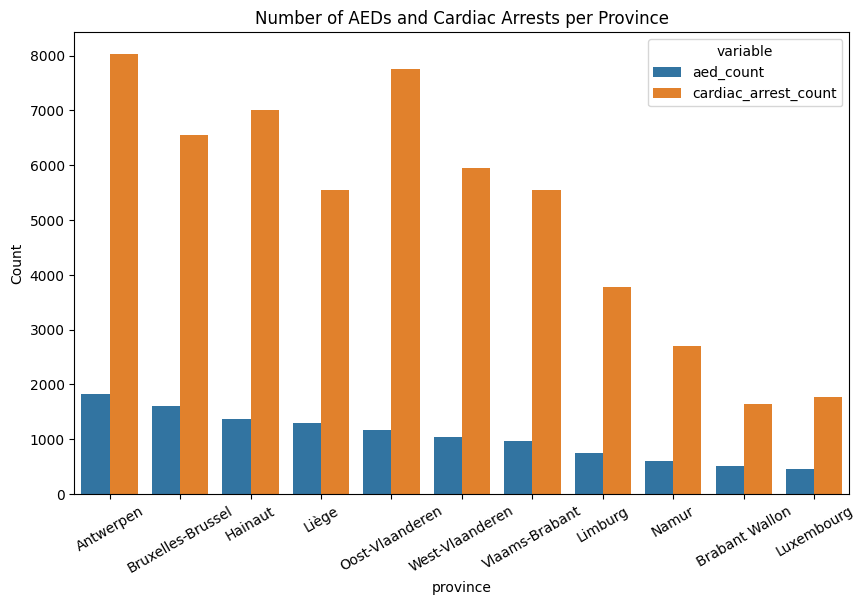

In [125]:
#making some exploratory plots that can be interesting for the stake holder
import seaborn as sns
import matplotlib.pyplot as plt

#count the number of AEDs and Cardiac Arrests per province
aed_counts = aed_locations['province'].value_counts().reset_index()
aed_counts.columns = ['province', 'aed_count']

cardiac_arrest_counts = card_arrest['province'].value_counts().reset_index()
cardiac_arrest_counts.columns = ['province', 'cardiac_arrest_count']

#merge the counts into a single DataFrame
merged_counts = pd.merge(aed_counts, cardiac_arrest_counts, on='province')

# the plot itself plot
plt.figure(figsize=(10, 6))
sns.barplot(x='province', y='value', hue='variable', 
            data=pd.melt(merged_counts, id_vars='province'))
plt.title('Number of AEDs and Cardiac Arrests per Province')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

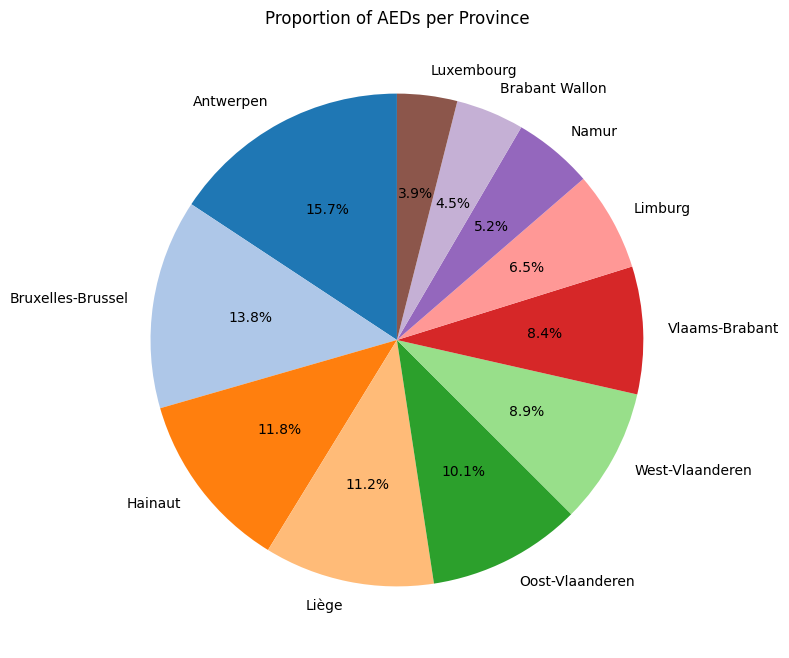

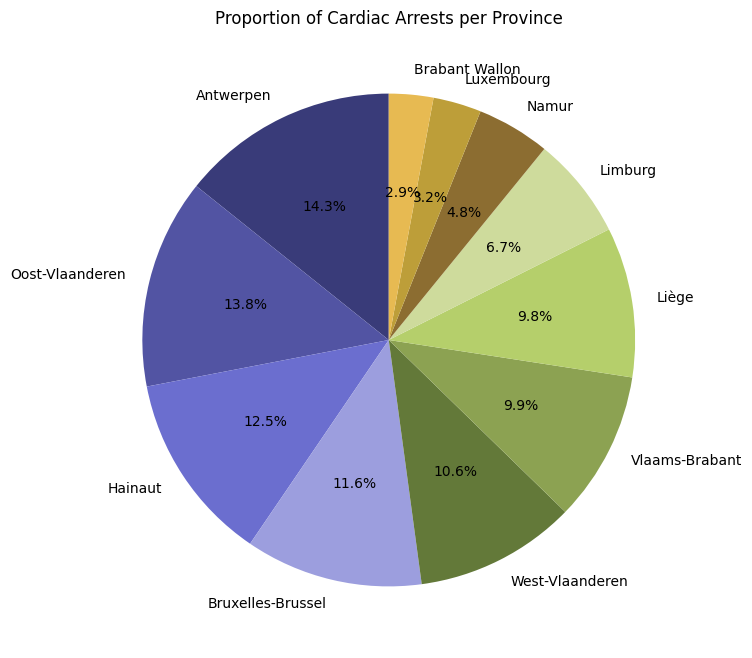

In [134]:
#pie charts showing the proportions
#there are some discrepancies between amount of cardiac arrests and amount of AED's available in the province visible in the pie charts, some examples:
#Brussels has the second most AED's while having the fifth most cardiac arrests
#East-Flanders has the second most cardiac arrests while having the fifth most AED's.
#however, these plots only show the amount of AED's, not how useful they actually are.

aed_province_counts = aed_locations['province'].value_counts()

plt.figure(figsize=(8, 8))
aed_province_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)
plt.title('Proportion of AEDs per Province')
plt.ylabel('')
plt.show()

# Pie chart for Cardiac Arrests
cardiac_arrest_province_counts = card_arrest['province'].value_counts()

plt.figure(figsize=(8, 8))
cardiac_arrest_province_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20b').colors)
plt.title('Proportion of Cardiac Arrests per Province')
plt.ylabel('')
plt.show()
